In [1]:
try:
    %load_ext autoreload
    %autoreload 2
    from IPython.core.display import display, HTML
    display(HTML("<style>.container { width:100% !important; }</style>"))
except:
    pass

In [2]:
import sympy
from sympy import Matrix
from sympy import symbols
from sympy import diff
import numpy as np
import matplotlib.pyplot as plt
import pickle
from utility import load_data,train_val_data

In [3]:
path_to_file = '../HR_data_test/'
#path_to_file = '../HR_data/'
L,N,dx,batch_size,MC_inform = load_data(path_to_file,max_train=128)
input_shape = (N,1)

In [4]:
rhos,Vexts,mus = train_val_data(path_to_file,N,MC_inform,test_size=0)

In [5]:
filename = 'final_eq.dat'
outfile = open(filename,'rb')
final_fed = pickle.load(outfile)
outfile.close()
sympy.simplify(final_fed)

(0.103874306539186*n0*(0.279154846068758*n0 + 0.500281269664524*n1) + 0.122517545717652*log(0.566341394666636*n0 + 1) - 0.470562784636557*log(-0.510894510358708*n0 - 0.76480348103689*n1 + 1) - 0.321652148238458*log(-0.350246544963239*n0 - 0.504775752572658*n1 + 1))*(0.515129134820969*n0*(0.279154846068758*n0 + 0.500281269664524*n1) + 0.594726208781588*log(0.428034106727878*n0 + 1) + 0.691188802762345*log(0.566341394666636*n0 + 1) - 0.212426721201849*log(-0.510894510358708*n0 - 0.76480348103689*n1 + 1) - 0.220365988745398*log(-0.350246544963239*n0 - 0.504775752572658*n1 + 1)) + log(0.15567726729387*n0*(0.279154846068758*n0 + 0.500281269664524*n1) + 1) + log(0.16015333227139*n0*(0.279154846068758*n0 + 0.500281269664524*n1) + 1) + log(0.160317596664514*n0*(0.279154846068758*n0 + 0.500281269664524*n1) + 1) + log(0.164020460354068*n0*(0.279154846068758*n0 + 0.500281269664524*n1) + 1) + log(0.164098714691245*n0*(0.279154846068758*n0 + 0.500281269664524*n1) + 1)

In [6]:
filename = 'w_weight'
outfile = open(filename,'rb')
w_weight = pickle.load(outfile)
outfile.close()
w_weight.shape
tmp = []
for w in w_weight:
    tmp.append(w[0]+w[1]*1j)
w_weight = np.asarray(tmp)

In [7]:
n_conv = w_weight.shape[0]

In [8]:
sympy.simplify(sympy.expand(sympy.simplify(final_fed)))

0.00416979394172929*n0**4 + 0.0149456105583348*n0**3*n1 + 0.0133922250165659*n0**2*n1**2 + 0.0172452854228496*n0**2*log(0.428034106727878*n0 + 1) + 0.0376605332033246*n0**2*log(0.566341394666636*n0 + 1) - 0.0738270432605812*n0**2*log(-0.510894510358708*n0 - 0.76480348103689*n1 + 1) - 0.0526437905297888*n0**2*log(-0.350246544963239*n0 - 0.504775752572658*n1 + 1) + 0.0309057621910147*n0*n1*log(0.428034106727878*n0 + 1) + 0.067492503291745*n0*n1*log(0.566341394666636*n0 + 1) - 0.132307525583433*n0*n1*log(-0.510894510358708*n0 - 0.76480348103689*n1 + 1) - 0.0943444211593915*n0*n1*log(-0.350246544963239*n0 - 0.504775752572658*n1 + 1) + 0.0728643954738844*log(0.428034106727878*n0 + 1)*log(0.566341394666636*n0 + 1) - 0.279856020900607*log(0.428034106727878*n0 + 1)*log(-0.510894510358708*n0 - 0.76480348103689*n1 + 1) - 0.191294962668312*log(0.428034106727878*n0 + 1)*log(-0.350246544963239*n0 - 0.504775752572658*n1 + 1) + 0.084682755741965*log(0.566341394666636*n0 + 1)**2 - 0.351273728263956*lo

In [9]:
def diff_fed(fed):
    n = symbols("n0:"+str(n_conv))
    df_dn = []
    for i in range(n_conv):
        tmp = diff(fed,n[i])
        df_dn.append(sympy.lambdify(sympy.symbols("n0:"+str(n_conv)),tmp))
        
    return df_dn

In [10]:
df_dn = diff_fed(final_fed)

In [11]:
df_dn

[<function _lambdifygenerated(n0, n1)>, <function _lambdifygenerated(n0, n1)>]

In [12]:
sympy.simplify(final_fed);

(-10, 10)

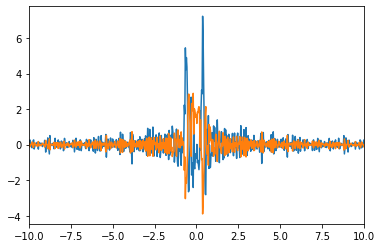

In [13]:
for w in w_weight:
    x = np.linspace(-N/2+1,N/2,N)*dx
    plt.plot(x,np.roll(np.fft.irfft(w)*N**0.5,N//2))
plt.xlim([-10,+10])

/home/sam/anaconda3/envs/pytorch/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/sam/anaconda3/envs/pytorch/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


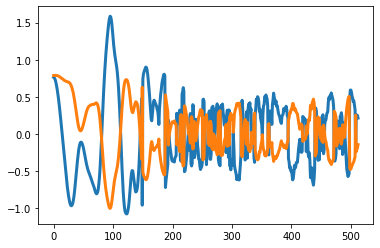

In [14]:
for i in range (n_conv):
    plt.plot(w_weight[i],linewidth=3,label=r"$\omega_{"+str(i)+"}$")

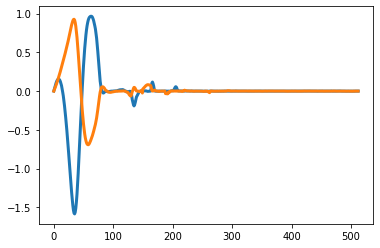

In [15]:
for i in range (n_conv):
    plt.plot(np.imag(w_weight[i]),linewidth=3,label=r"$\omega_{"+str(i)+"}$")

In [16]:
def conv (rho,w,cross=False):
    n=0
    if(cross==True):
        n = np.fft.irfft(np.fft.rfft(rho)*np.conj(w))        
        #n = np.flip(np.correlate(np.flip(rho_pad),w))-np.correlate(rho_pad,np.flip(w))
    else:
        n = np.fft.irfft(np.fft.rfft(rho)*w)        
        
    return n

In [17]:
cal_f=sympy.lambdify(sympy.symbols("n0:"+str(n_conv)),final_fed)
dfdn = diff_fed(final_fed)

def cal_c1(rho,w,fed):
    
    n_array = np.zeros([n_conv,N])
    for i in range(n_conv):
        n_array[i]=conv(rho,w[i])
    
    f = cal_f(*n_array)
    #print(n_array)
    tmp=[]
    for i in range(n_conv):
        tmp.append(dfdn[i](*n_array))
        #print(tmp)
    dfdn_eval = tmp
    dfdn_cross = []
    for i in range(n_conv):
        dfdn_cross.append(conv(dfdn_eval[i],w[i],cross=True))
    #print(dfdn_cross)
    c1 = np.sum(dfdn_cross,axis=0)
    return c1,f

In [20]:
def picard(rho,Vext,w,alpha=10**-3,mu=0,N_fix=False):
    c1 = cal_c1(rho,w,final_fed)[0]
    rho_new = np.exp(-c1-Vext)
    if(N_fix==True):
        mu=np.log(np.sum(rho)/np.sum(rho_new))
    rho_new*=np.exp(mu)
    rho=(1-alpha)*rho+alpha*rho_new
    error=np.mean((rho_new-rho)**2)
    return rho,error

In [21]:
MC_inform

[['0', '0.5', '2.718281828459045'],
 ['1', '0.55', '4.149106117565329'],
 ['2', '0.6', '6.722533605507095'],
 ['3', '0.65', '11.895760374043515'],
 ['4', '0.7', '24.061936503093442'],
 ['5', '0.75', '60.256610769563025'],
 ['6', '0.8', '218.3926001325772']]

In [22]:

#MC_inform
#i=np.random.randint(0,32)
i=5
print(MC_inform[i])
print("i=",i)
Vext = Vexts[i]
rho_test = rhos[i]
mu = mus[i]
eps = 0
print(mu,np.log(float(MC_inform[i][2])))
#mu=0.22182268
#eps=2

alpha=10**-3
rho=np.full(N,np.mean(rho_test))
error_array=[]
threshold=10**-6
for i in range(100000):
    rho,error=picard(rho,Vext,w_weight,alpha,mu,N_fix=True)
    error_array+=[error]
    if(i%1000==0):
        print(error)
    if(error<threshold):
        break

['5', '0.75', '60.256610769563025']
i= 5
4.09861228866811 4.09861228866811
0.01837101324192161
0.00870181782344846
0.002471833791542915
0.0007329183408476153
0.0002340225677881352
8.057218856252483e-05
2.9649605500798942e-05
1.1528269643033642e-05
4.685681965842438e-06
1.973297544991896e-06


(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5]),
 <a list of 9 Text yticklabel objects>)

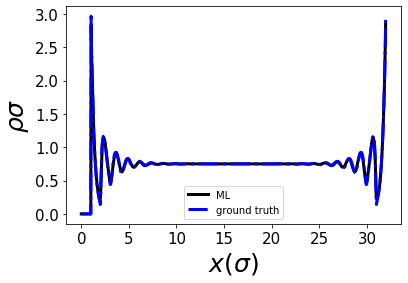

In [23]:
x=np.linspace(0,L-dx,N)
plt.plot(x,rho,"k-",lw=3,label="ML")
plt.plot(x,rho_test,"b-.",lw=3,ms=2,label="ground truth")
plt.legend()
plt.ylabel(r"$\rho\sigma$",fontsize=25)
plt.xlabel(r"$x(\sigma)$",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.title(r"$\rho_0\sigma=0.43$",fontsize=25)
#plt.savefig("rho_HR_inside.eps",format="eps",bbox_inches='tight')

In [24]:
def eos(rho0,w):
    rho=np.full(N,rho0)
    c1,f=cal_c1(rho,w,final_fed)
    p=f-rho*c1
    return -p[0]+rho0

In [25]:
rho0_array=np.linspace(0,0.9,100)
rho0_array1=np.linspace(0,0.9,20)

P_ML=np.zeros(len(rho0_array1))
for i in range (len(P_ML)):
    P_ML[i]=eos(rho0_array1[i],w_weight)

max(P_ML)

9.059283037564521

Text(0.5, 0, '$\\rho\\sigma$')

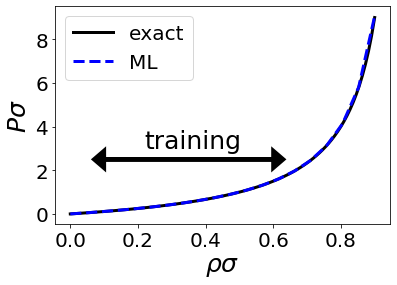

In [26]:
plt.plot(rho0_array,rho0_array/(1-rho0_array),"k-",linewidth=3,label="exact")
plt.plot(rho0_array1,P_ML,"b--",linewidth=3,label="ML")
plt.legend(fontsize=20)
plt.arrow(0.1, 2.5, 0.5, 0, head_width=0.8, head_length=0.03, linewidth=4, color='k')
plt.arrow(0.6, 2.5, -0.5, 0, head_width=0.8, head_length=0.03, linewidth=4, color='k')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.text(0.22,3,"training",fontsize=25)
plt.ylabel(r"$P\sigma$",fontsize=25)
plt.xlabel(r"$\rho\sigma$",fontsize=25)
#plt.text(-0.2,10,r"$(a)$",fontsize=25)
#plt.savefig("PHR.eps",format="eps",bbox_inches='tight')

In [27]:
def mu_FMT (rho):
    R=0.5
    return (2*R*rho)/(1 - 2*R*rho) - np.log(1 - 2*R*rho)+np.log(rho)


In [28]:
rho0_array=np.linspace(0.01,0.9,100)
mu_ML=np.zeros(len(rho0_array))
for i in range (len(mu_ML)):
    mu_ML[i]=(cal_c1(np.full(N,rho0_array[i]),w_weight,final_fed)[0])[0]+np.log(rho0_array[i])

In [29]:
rho0_FMT=np.linspace(0.01,0.9,100)
mu_FMT_array=mu_FMT(rho0_FMT)

Text(0.5, 0, '$\\rho\\sigma$')

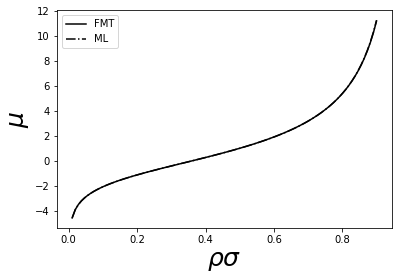

In [30]:
plt.plot(rho0_FMT,mu_FMT_array,"k-",label="FMT")
plt.plot(rho0_array,mu_ML,"k-.",label="ML")
plt.legend()
plt.ylabel(r"$\mu$",fontsize=25)
plt.xlabel(r"$\rho\sigma$",fontsize=25)

In [31]:
path_to_file = '../HR_data_wall/'
#path_to_file = '../HR_data/'
L,N,dx,batch_size,MC_inform = load_data(path_to_file,max_train=128)
input_shape = (N,1)

In [32]:
rhos,Vexts,mus = train_val_data(path_to_file,N,MC_inform,test_size=0)

In [33]:

#MC_inform
#i=np.random.randint(0,32)
i=6
print(MC_inform[i])
print("i=",i)
Vext = Vexts[i]
rho_test = rhos[i]
mu = mus[i]
eps = 0
print(mu,np.log(float(MC_inform[i][2])))
#mu=0.22182268
#eps=2

alpha=10**-3
rho=np.full(N,0.5)
error_array=[]
threshold=10**-6
for i in range(100000):
    rho,error=picard(rho,Vext,w_weight,alpha,mu)
    error_array+=[error]
    if(i%1000==0):
        print(error)
    if(error<threshold):
        break

['6', '0.8', '218.3926001325772']
i= 6
5.386294361119892 5.386294361119892
1526.500709585865
0.007949920180845855
0.0024561762353376452
0.0008676890396982569
0.0003433578065360711
0.00014839718716871356
6.855555573450553e-05
3.332586489497573e-05
1.6855057792368575e-05
8.795132574303542e-06
4.704816843867024e-06
2.567346320246958e-06
1.4235827890399246e-06


(0, 10)

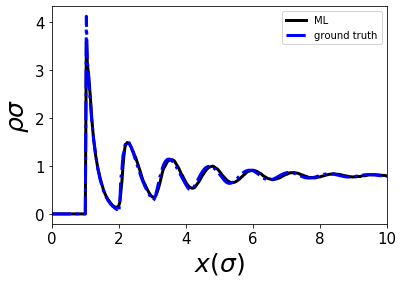

In [34]:
x=np.linspace(0,L-dx,N)
plt.plot(x,rho,"k-",lw=3,label="ML")
plt.plot(x,rho_test,"b-.",lw=3,ms=2,label="ground truth")
plt.legend()
plt.ylabel(r"$\rho\sigma$",fontsize=25)
plt.xlabel(r"$x(\sigma)$",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim([0,10])
#plt.title(r"$\rho_0\sigma=0.43$",fontsize=25)
#plt.savefig("rho_HR_inside.eps",format="eps",bbox_inches='tight')